In [1]:
import pandas as pd  
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split 

In [4]:
df = pd.read_csv("weatherAUS.csv") 

In [5]:
df.head()  

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Pressure9am', 'Pressure3pm'] 
check_rows = features[:]
check_rows.append('RainTomorrow')

In [8]:
df= df.dropna( subset = check_rows) 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126600 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           126600 non-null  object 
 1   Location       126600 non-null  object 
 2   MinTemp        126600 non-null  float64
 3   MaxTemp        126600 non-null  float64
 4   Rainfall       126600 non-null  float64
 5   Evaporation    80494 non-null   float64
 6   Sunshine       73673 non-null   float64
 7   WindGustDir    121320 non-null  object 
 8   WindGustSpeed  121376 non-null  float64
 9   WindDir9am     119702 non-null  object 
 10  WindDir3pm     125077 non-null  object 
 11  WindSpeed9am   126357 non-null  float64
 12  WindSpeed3pm   125757 non-null  float64
 13  Humidity9am    125725 non-null  float64
 14  Humidity3pm    124481 non-null  float64
 15  Pressure9am    126600 non-null  float64
 16  Pressure3pm    126600 non-null  float64
 17  Cloud9am       84195 non-null

In [10]:
X= df[features]
y= df['RainTomorrow']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [12]:
len(X_train)/len(X)    

0.75

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred = clf.predict(X_test)

In [17]:
y_pred

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [18]:
clf.score(X_test, y_test)

0.7898578199052133

(array([98515.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 28085.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

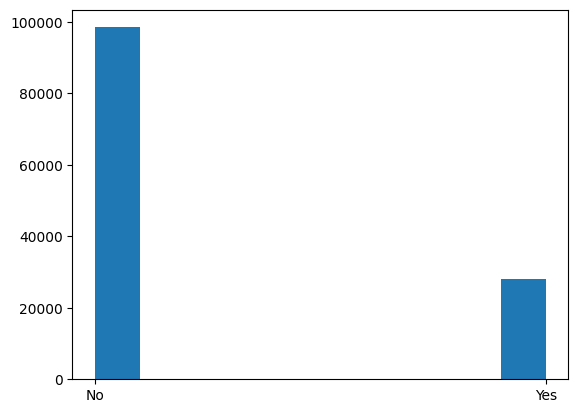

In [19]:
plt.hist(df['RainTomorrow'])

In [20]:
from sklearn.metrics import precision_score, matthews_corrcoef

In [23]:

# Assuming 'y_test' and 'y_pred' are your actual and predicted labels
positive_label = 'Yes'  # Replace with the actual positive label in your dataset
precision = precision_score(y_test, y_pred, pos_label=positive_label)
print(f'Precision: {precision:.4f}')

Precision: 0.5351


In [24]:
# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc:.4f}')

MCC: 0.3434
